# 🌤️ Prediksi Cuaca Mikro dengan Machine Learning
## Micro-Weather Prediction System

---

### 📋 Deskripsi Proyek
Sistem prediksi cuaca mikro untuk memprediksi kondisi cuaca lokal berdasarkan berbagai parameter meteorologi seperti suhu, kelembapan, tekanan udara, kecepatan angin, dan lainnya.

### 🎯 Tujuan
- Memprediksi kondisi cuaca (Cerah, Hujan, Berawan, Berangin)
- Membandingkan performa berbagai algoritma ML
- Menganalisis fitur yang paling berpengaruh

### 🛠️ Tools & Libraries
- Python 3.x
- Pandas, NumPy
- Scikit-learn
- Matplotlib, Seaborn

## 1️⃣ Import Library yang Diperlukan

In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

import pickle
import joblib

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Semua library berhasil diimport!")
print(f"📅 Waktu eksekusi: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Semua library berhasil diimport!
📅 Waktu eksekusi: 2025-11-07 22:08:40


## 2️⃣ Load dan Eksplorasi Dataset

In [38]:
df = pd.read_csv('data_cuaca_mikro.csv')

print("✅ Dataset berhasil dimuat!")
print(f"📊 Dimensi dataset: {df.shape}")
print(f"📋 Jumlah baris: {df.shape[0]}")
print(f"📋 Jumlah kolom: {df.shape[1]}")
print("\n" + "="*70)

✅ Dataset berhasil dimuat!
📊 Dimensi dataset: (96, 12)
📋 Jumlah baris: 96
📋 Jumlah kolom: 12



In [39]:
print("🔍 10 Baris Pertama Dataset:")
df.head(10)

🔍 10 Baris Pertama Dataset:


,Tanggal,Waktu,Suhu (Celsius),Kelembapan (%),Tekanan Udara (hPa),Kecepatan Angin (km/h),Arah Angin (derajat),Curah Hujan (mm),Ketinggian (m),Lokasi_Latitude,Lokasi_Longitude,Kondisi Cuaca
0,2025-11-07,00:00,24.5,68.2,1012.3,15.4,180.5,0.0,100,-6.175,106.828,Cerah
1,2025-11-07,01:00,23.8,70.5,1011.8,12.3,175.2,0.2,100,-6.175,106.828,Cerah
2,2025-11-07,02:00,23.2,72.8,1011.2,10.8,170.8,0.0,100,-6.175,106.828,Berawan
3,2025-11-07,03:00,22.9,74.5,1010.5,9.5,168.3,0.5,100,-6.175,106.828,Berawan
4,2025-11-07,04:00,22.5,76.2,1009.8,8.2,165.7,1.2,100,-6.175,106.828,Hujan
5,2025-11-07,05:00,22.3,78.5,1009.2,7.8,162.4,2.3,100,-6.175,106.828,Hujan
6,2025-11-07,06:00,23.1,75.8,1010.1,11.2,158.9,0.8,100,-6.175,106.828,Cerah
7,2025-11-07,07:00,24.8,71.3,1011.5,14.5,155.2,0.0,100,-6.175,106.828,Cerah
8,2025-11-07,08:00,26.5,65.7,1012.8,18.3,150.6,0.0,100,-6.175,106.828,Cerah
9,2025-11-07,09:00,28.2,58.4,1013.5,22.1,145.8,0.0,100,-6.175,106.828,Cerah


In [40]:
print("📋 Informasi Dataset:")
print("="*70)
df.info()

📋 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tanggal                 96 non-null     object 
 1   Waktu                   96 non-null     object 
 2   Suhu (Celsius)          96 non-null     float64
 3   Kelembapan (%)          96 non-null     float64
 4   Tekanan Udara (hPa)     96 non-null     float64
 5   Kecepatan Angin (km/h)  96 non-null     float64
 6   Arah Angin (derajat)    96 non-null     float64
 7   Curah Hujan (mm)        96 non-null     float64
 8   Ketinggian (m)          96 non-null     int64  
 9   Lokasi_Latitude         96 non-null     float64
 10  Lokasi_Longitude        96 non-null     float64
 11  Kondisi Cuaca           96 non-null     object 
dtypes: float64(8), int64(1), object(3)
memory usage: 9.1+ KB


In [41]:
print("📈 Statistik Deskriptif:")
print("="*70)
df.describe().round(2)

📈 Statistik Deskriptif:


,Suhu (Celsius),Kelembapan (%),Tekanan Udara (hPa),Kecepatan Angin (km/h),Arah Angin (derajat),Curah Hujan (mm),Ketinggian (m),Lokasi_Latitude,Lokasi_Longitude
count,96.00,96.00,96.00,96.00,96.00,96.00,96.0,96.00,96.00
mean,26.69,63.65,1012.86,21.04,143.22,0.62,100.0,-6.17,106.83
std,2.72,10.83,2.14,8.56,29.82,0.87,0.0,0.00,0.00
min,22.30,42.80,1009.20,7.80,85.30,0.00,100.0,-6.18,106.83
25%,24.50,53.85,1011.20,14.10,118.72,0.00,100.0,-6.18,106.83
50%,25.80,67.00,1012.65,19.00,145.80,0.20,100.0,-6.18,106.83
75%,29.22,73.28,1014.58,28.55,168.42,0.90,100.0,-6.18,106.83
max,31.80,78.50,1017.20,37.20,195.80,3.50,100.0,-6.18,106.83


In [42]:
print("🔍 Cek Missing Values:")
print("="*70)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Kolom': missing.index,
    'Missing Values': missing.values,
    'Persentase (%)': missing_pct.values
})
print(missing_df[missing_df['Missing Values'] > 0])

if missing.sum() == 0:
    print("\n✅ Tidak ada missing values!")
else:
    print(f"\n⚠️ Total missing values: {missing.sum()}")

🔍 Cek Missing Values:
Empty DataFrame
Columns: [Kolom, Missing Values, Persentase (%)]
Index: []

✅ Tidak ada missing values!


In [43]:
print("🎯 Distribusi Kondisi Cuaca (Target Variable):")
print("="*70)
kondisi_cuaca_dist = df['Kondisi Cuaca'].value_counts()
kondisi_cuaca_pct = df['Kondisi Cuaca'].value_counts(normalize=True) * 100

distribusi_df = pd.DataFrame({
    'Kondisi': kondisi_cuaca_dist.index,
    'Jumlah': kondisi_cuaca_dist.values,
    'Persentase (%)': kondisi_cuaca_pct.values.round(2)
})
print(distribusi_df)
print(f"\n📊 Total: {kondisi_cuaca_dist.sum()} sampel")

🎯 Distribusi Kondisi Cuaca (Target Variable):
    Kondisi  Jumlah  Persentase (%)
0     Cerah      37           38.54
1     Hujan      23           23.96
2  Berangin      21           21.88
3   Berawan      15           15.62

📊 Total: 96 sampel


## 3️⃣ Exploratory Data Analysis (EDA) & Visualisasi

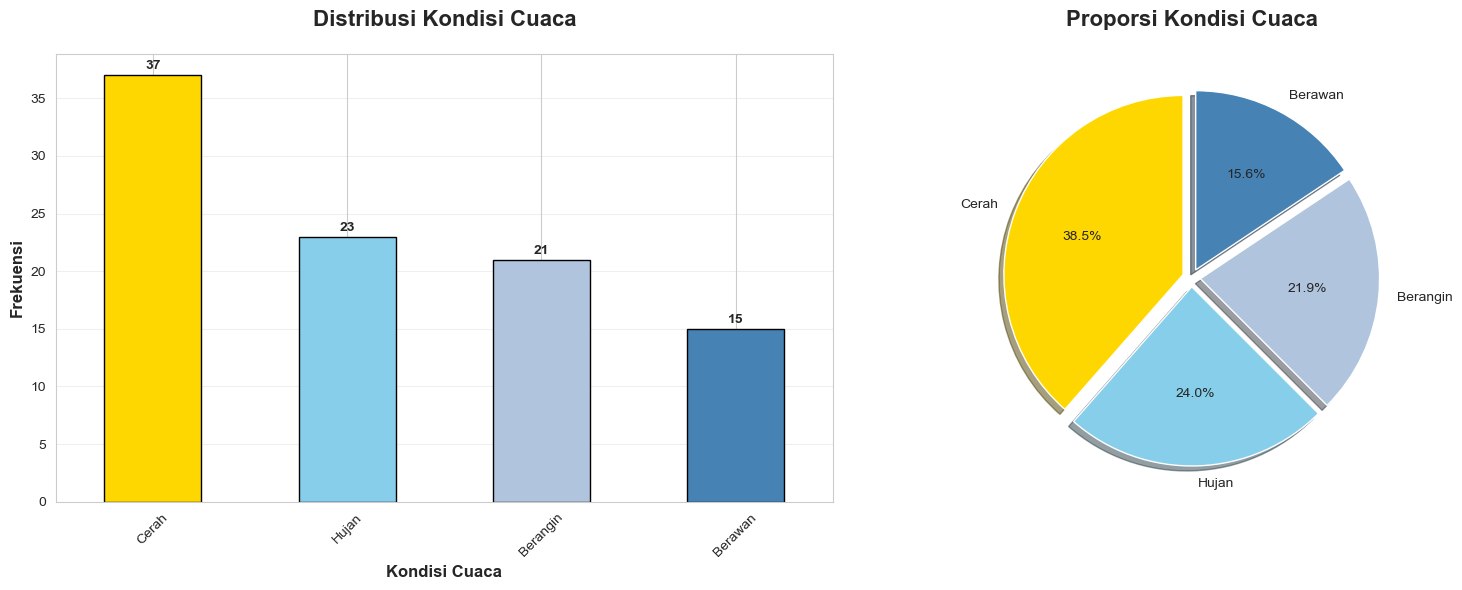

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['#FFD700', '#87CEEB', '#B0C4DE', '#4682B4']
kondisi_cuaca_dist.plot(kind='bar', ax=axes[0], color=colors, edgecolor='black')
axes[0].set_title('Distribusi Kondisi Cuaca', fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('Kondisi Cuaca', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frekuensi', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(kondisi_cuaca_dist.values):
    axes[0].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

axes[1].pie(kondisi_cuaca_dist.values, labels=kondisi_cuaca_dist.index, 
            autopct='%1.1f%%', colors=colors, startangle=90,
            explode=[0.05]*len(kondisi_cuaca_dist), shadow=True)
axes[1].set_title('Proporsi Kondisi Cuaca', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

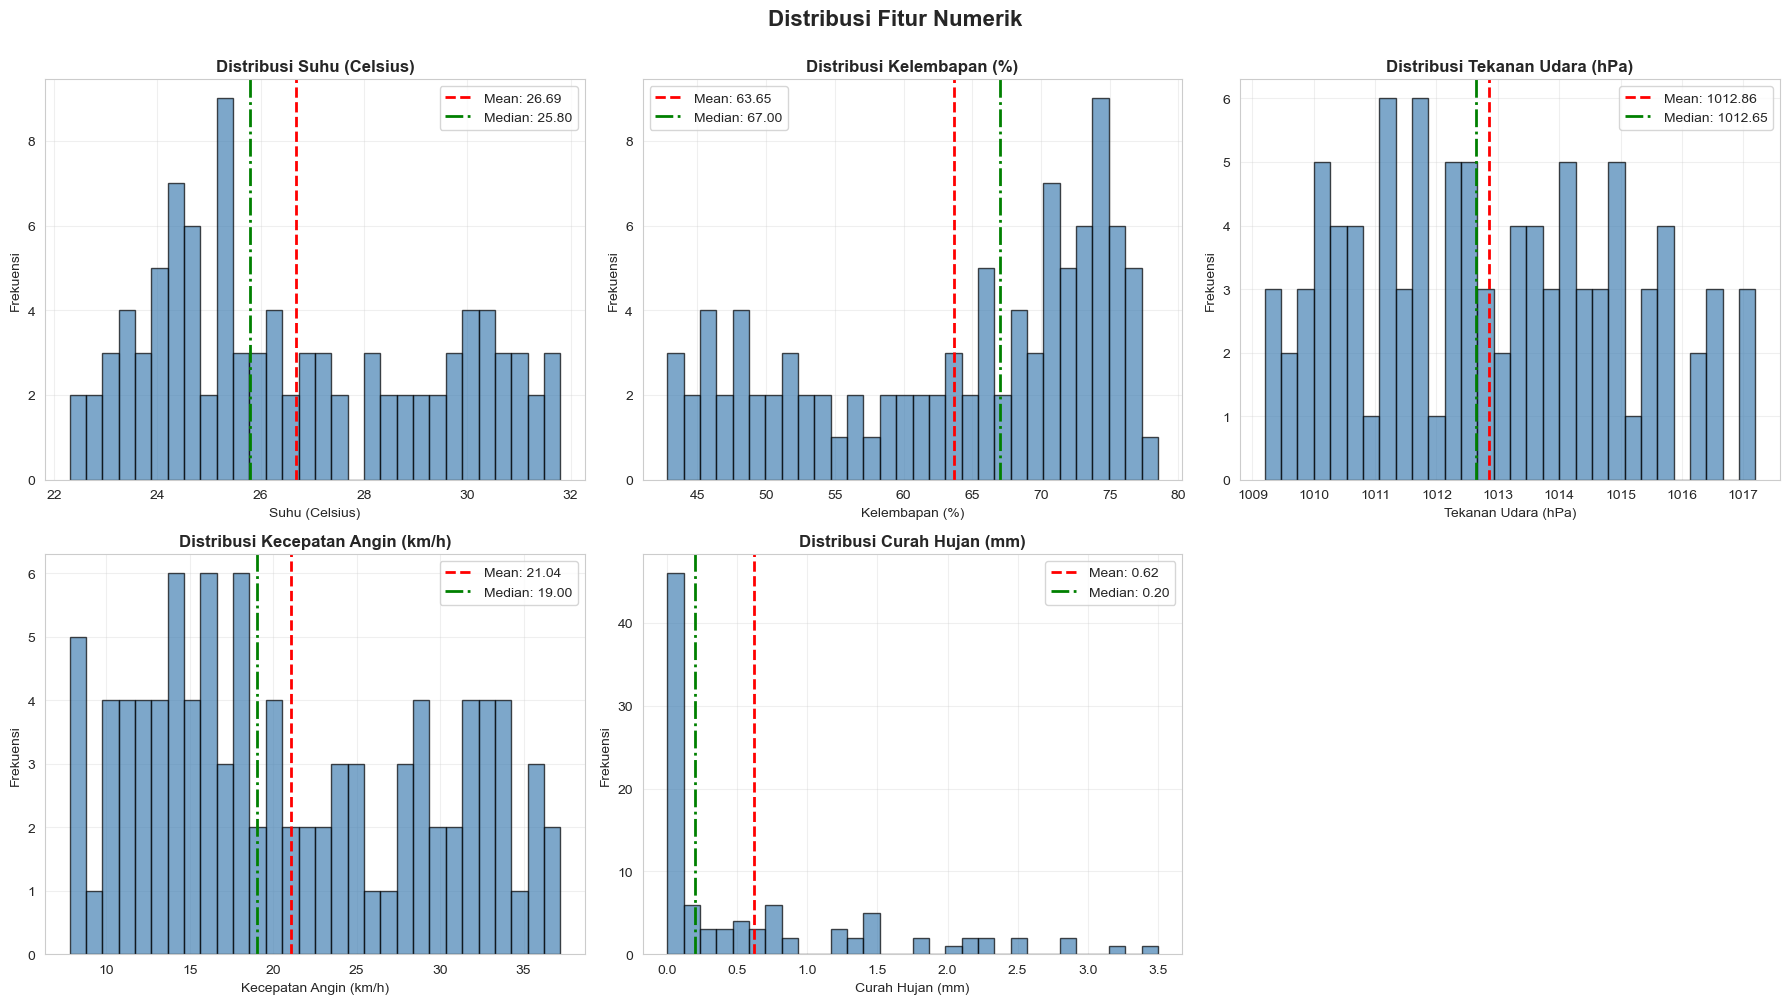

In [45]:
numeric_features = ['Suhu (Celsius)', 'Kelembapan (%)', 'Tekanan Udara (hPa)', 
                    'Kecepatan Angin (km/h)', 'Curah Hujan (mm)']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    axes[idx].hist(df[feature], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribusi {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frekuensi', fontsize=10)
    axes[idx].grid(alpha=0.3)
    
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

fig.delaxes(axes[-1])

plt.suptitle('Distribusi Fitur Numerik', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

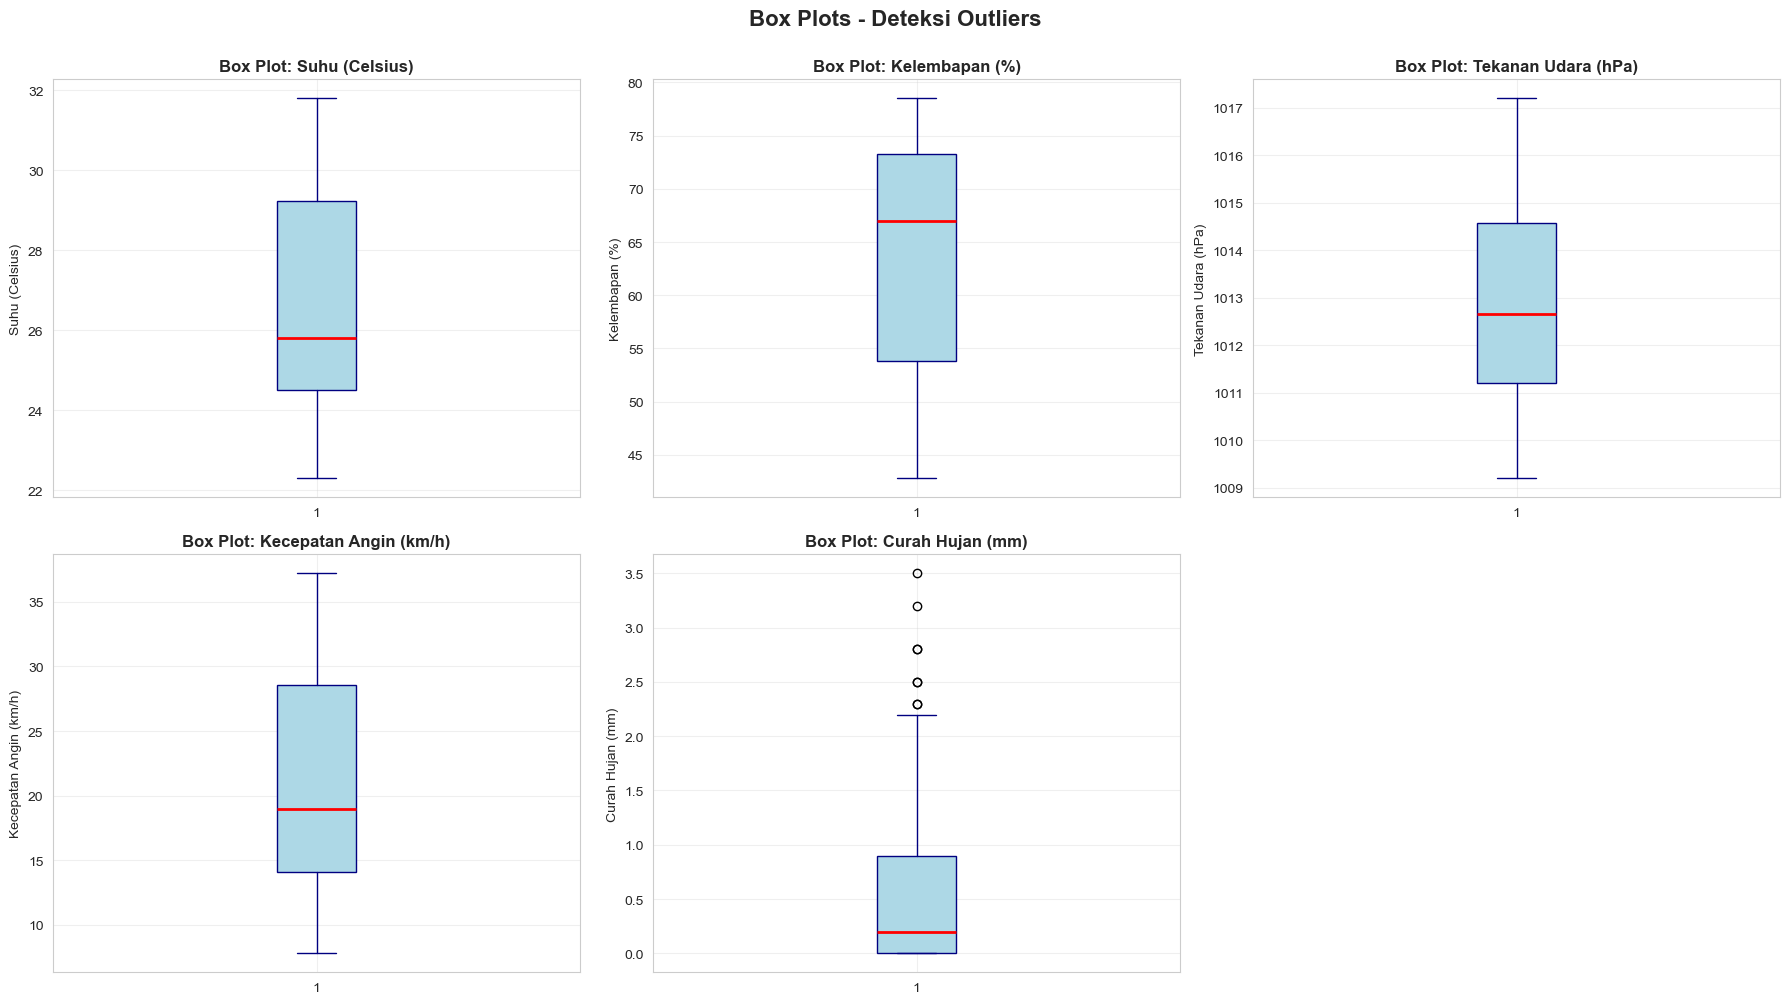

In [46]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    axes[idx].boxplot(df[feature], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', color='navy'),
                      whiskerprops=dict(color='navy'),
                      capprops=dict(color='navy'),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Box Plot: {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].grid(alpha=0.3)

fig.delaxes(axes[-1])

plt.suptitle('Box Plots - Deteksi Outliers', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

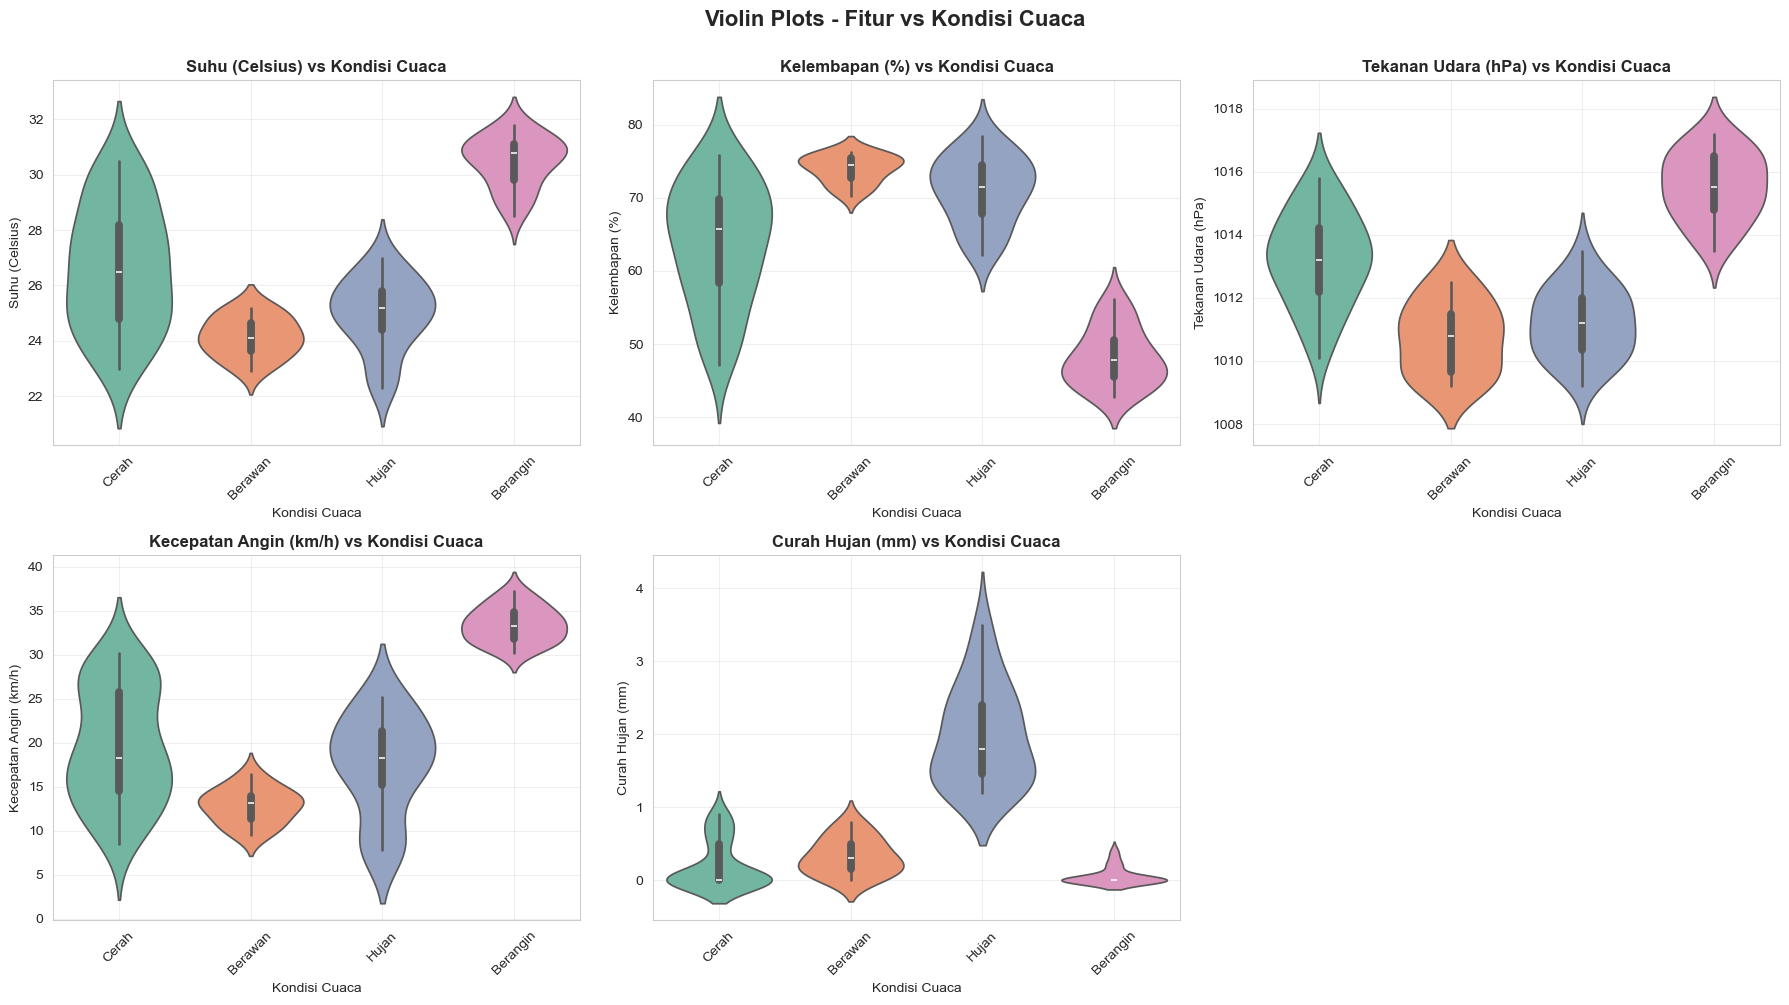

In [47]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    sns.violinplot(data=df, x='Kondisi Cuaca', y=feature, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{feature} vs Kondisi Cuaca', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Kondisi Cuaca', fontsize=10)
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(alpha=0.3)

fig.delaxes(axes[-1])

plt.suptitle('Violin Plots - Fitur vs Kondisi Cuaca', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

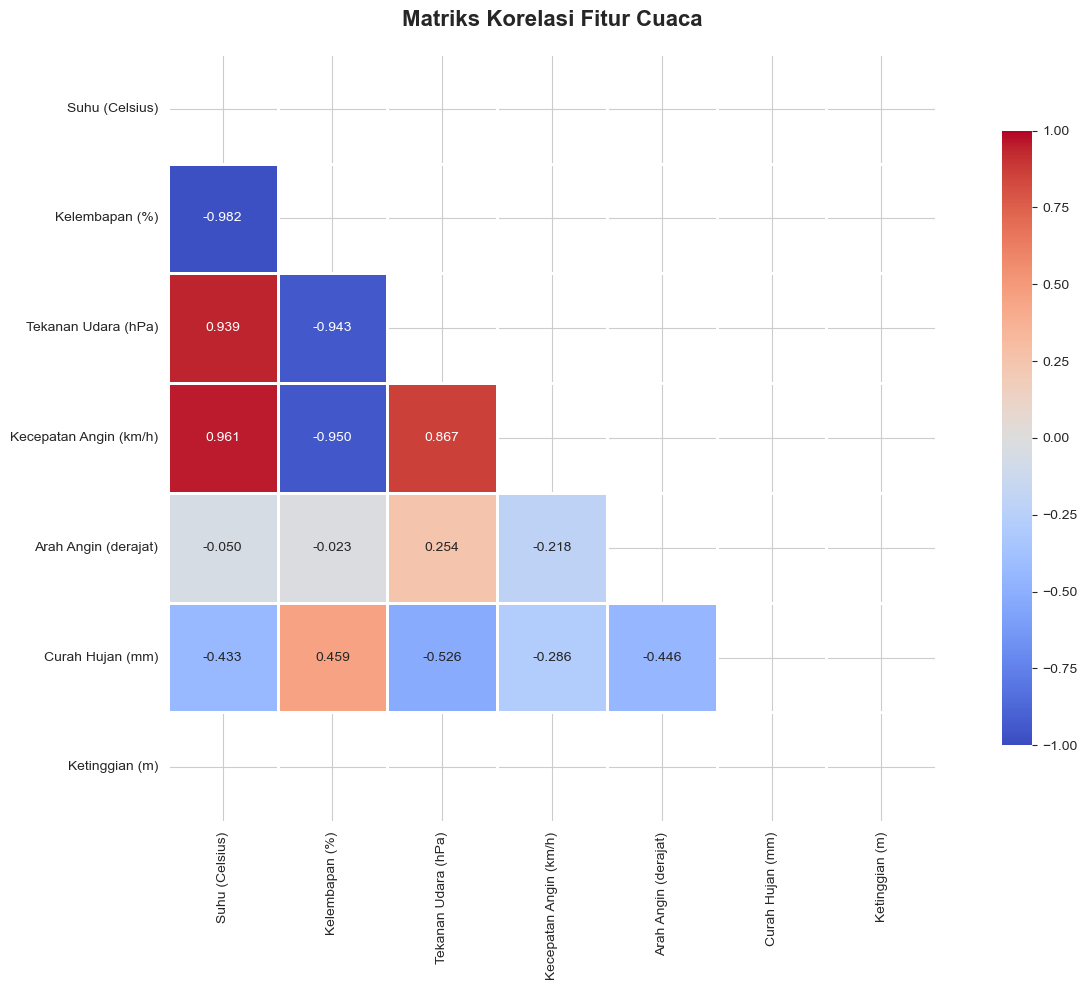


🔗 Korelasi Tertinggi (|r| > 0.5):
Suhu (Celsius)       Kecepatan Angin (km/h)    0.960871
                     Tekanan Udara (hPa)       0.938824
Tekanan Udara (hPa)  Kecepatan Angin (km/h)    0.866519
                     Curah Hujan (mm)         -0.526366
Kelembapan (%)       Tekanan Udara (hPa)      -0.943245
                     Kecepatan Angin (km/h)   -0.950053
Suhu (Celsius)       Kelembapan (%)           -0.982422
dtype: float64


In [48]:
correlation_features = ['Suhu (Celsius)', 'Kelembapan (%)', 'Tekanan Udara (hPa)', 
                        'Kecepatan Angin (km/h)', 'Arah Angin (derajat)', 
                        'Curah Hujan (mm)', 'Ketinggian (m)']

correlation = df[correlation_features].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            mask=mask, vmin=-1, vmax=1)
plt.title('Matriks Korelasi Fitur Cuaca', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n🔗 Korelasi Tertinggi (|r| > 0.5):")
print("="*70)
corr_pairs = correlation.unstack()
corr_pairs = corr_pairs[corr_pairs != 1.0]
corr_pairs = corr_pairs[abs(corr_pairs) > 0.5].sort_values(ascending=False)
print(corr_pairs.drop_duplicates())

📊 Membuat Pairplot... (ini mungkin memakan waktu beberapa saat)


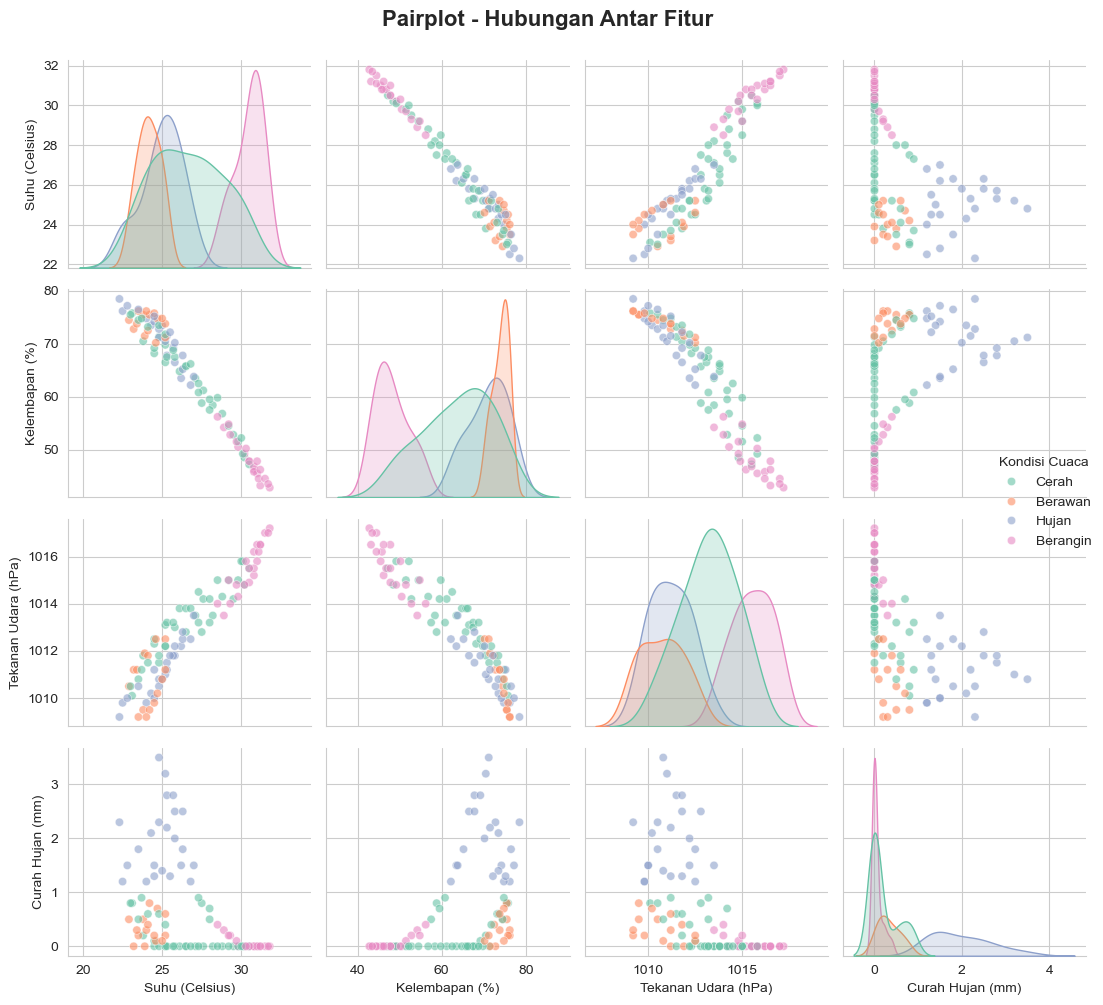

In [49]:
print("📊 Membuat Pairplot... (ini mungkin memakan waktu beberapa saat)")

pairplot_features = ['Suhu (Celsius)', 'Kelembapan (%)', 
                     'Tekanan Udara (hPa)', 'Curah Hujan (mm)', 'Kondisi Cuaca']

sns.pairplot(df[pairplot_features], hue='Kondisi Cuaca', 
             palette='Set2', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot - Hubungan Antar Fitur', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 4️⃣ Data Preprocessing

In [50]:
df_processed = df.copy()

print("📋 Memulai Data Preprocessing...")
print("="*70)

📋 Memulai Data Preprocessing...


In [51]:
le = LabelEncoder()
df_processed['Kondisi Cuaca Encoded'] = le.fit_transform(df_processed['Kondisi Cuaca'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\n🏷️ Mapping Label:")
print("="*70)
for kondisi, kode in label_mapping.items():
    print(f"  {kondisi:15s} → {kode}")

print("\n✅ Label Encoding selesai!")


🏷️ Mapping Label:
  Berangin        → 0
  Berawan         → 1
  Cerah           → 2
  Hujan           → 3

✅ Label Encoding selesai!


In [52]:
feature_columns = ['Suhu (Celsius)', 'Kelembapan (%)', 'Tekanan Udara (hPa)', 
                   'Kecepatan Angin (km/h)', 'Arah Angin (derajat)', 
                   'Curah Hujan (mm)', 'Ketinggian (m)', 
                   'Lokasi_Latitude', 'Lokasi_Longitude']

X = df_processed[feature_columns]
y = df_processed['Kondisi Cuaca Encoded']

print("\n📊 Dimensi Data:")
print("="*70)
print(f"  Fitur (X) shape: {X.shape}")
print(f"  Target (y) shape: {y.shape}")
print(f"\n  Jumlah fitur: {X.shape[1]}")
print(f"  Jumlah sampel: {X.shape[0]}")
print(f"  Jumlah kelas: {len(np.unique(y))}")


📊 Dimensi Data:
  Fitur (X) shape: (96, 9)
  Target (y) shape: (96,)

  Jumlah fitur: 9
  Jumlah sampel: 96
  Jumlah kelas: 4


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n📊 Pembagian Data (Train-Test Split):")
print("="*70)
print(f"  Data Training:   {X_train.shape[0]} sampel ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"  Data Testing:    {X_test.shape[0]} sampel ({(X_test.shape[0]/len(X))*100:.1f}%)")
print(f"\n  Training X shape: {X_train.shape}")
print(f"  Training y shape: {y_train.shape}")
print(f"  Testing X shape:  {X_test.shape}")
print(f"  Testing y shape:  {y_test.shape}")


📊 Pembagian Data (Train-Test Split):
  Data Training:   76 sampel (79.2%)
  Data Testing:    20 sampel (20.8%)

  Training X shape: (76, 9)
  Training y shape: (76,)
  Testing X shape:  (20, 9)
  Testing y shape:  (20,)


In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Standarisasi Data Selesai!")
print("="*70)
print("\nStatistik Data Training Setelah Scaling:")
print(f"  Mean:  {X_train_scaled.mean(axis=0).round(3)}")
print(f"  Std:   {X_train_scaled.std(axis=0).round(3)}")
print(f"  Min:   {X_train_scaled.min(axis=0).round(3)}")
print(f"  Max:   {X_train_scaled.max(axis=0).round(3)}")


✅ Standarisasi Data Selesai!

Statistik Data Training Setelah Scaling:
  Mean:  [ 0. -0.  0. -0. -0.  0.  0.  0. -0.]
  Std:   [1. 1. 1. 1. 1. 1. 0. 0. 0.]
  Min:   [-1.591 -1.955 -1.769 -1.585 -1.892 -0.708  0.     0.    -0.   ]
  Max:   [ 1.915  1.266  2.052  1.929  1.72   3.536  0.     0.    -0.   ]


## 5️⃣ Training Model Machine Learning

In [55]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42, probability=True),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB()
}

print("🤖 Model yang Akan Dilatih:")
print("="*70)
for i, model_name in enumerate(models.keys(), 1):
    print(f"  {i}. {model_name}")
print("\n" + "="*70)

🤖 Model yang Akan Dilatih:
  1. Random Forest
  2. Decision Tree
  3. K-Nearest Neighbors
  4. Support Vector Machine
  5. Logistic Regression
  6. Gradient Boosting
  7. Naive Bayes



In [56]:
results = {}

print("\n🚀 Memulai Training Model...\n")
print("="*70)

for name, model in models.items():
    print(f"\n🔧 Training {name}...")
    
    start_time = datetime.now()
    model.fit(X_train_scaled, y_train)
    training_time = (datetime.now() - start_time).total_seconds()
    
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    results[name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred_test,
        'training_time': training_time
    }
    
    print(f"  ✅ Training Accuracy:   {train_accuracy*100:.2f}%")
    print(f"  ✅ Testing Accuracy:    {test_accuracy*100:.2f}%")
    print(f"  ✅ CV Accuracy:         {cv_scores.mean()*100:.2f}% (±{cv_scores.std()*100:.2f}%)")
    print(f"  ⏱️  Training Time:       {training_time:.3f} seconds")

print("\n" + "="*70)
print("✅ Training Semua Model Selesai!")
print("="*70)


🚀 Memulai Training Model...


🔧 Training Random Forest...
  ✅ Training Accuracy:   100.00%
  ✅ Testing Accuracy:    90.00%
  ✅ CV Accuracy:         90.75% (±6.83%)
  ⏱️  Training Time:       0.078 seconds

🔧 Training Decision Tree...
  ✅ Training Accuracy:   100.00%
  ✅ Testing Accuracy:    90.00%
  ✅ CV Accuracy:         89.58% (±6.47%)
  ⏱️  Training Time:       0.000 seconds

🔧 Training K-Nearest Neighbors...
  ✅ Training Accuracy:   86.84%
  ✅ Testing Accuracy:    85.00%
  ✅ CV Accuracy:         82.75% (±9.14%)
  ⏱️  Training Time:       0.000 seconds

🔧 Training Support Vector Machine...
  ✅ Training Accuracy:   86.84%
  ✅ Testing Accuracy:    85.00%
  ✅ CV Accuracy:         85.33% (±9.80%)
  ⏱️  Training Time:       0.001 seconds

🔧 Training Logistic Regression...
  ✅ Training Accuracy:   90.79%
  ✅ Testing Accuracy:    80.00%
  ✅ CV Accuracy:         86.67% (±9.43%)
  ⏱️  Training Time:       0.002 seconds

🔧 Training Gradient Boosting...
  ✅ Training Accuracy:   100.00%
  ✅ Te

## 6️⃣ Perbandingan Performa Model

In [57]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train Accuracy': [results[m]['train_accuracy']*100 for m in results.keys()],
    'Test Accuracy': [results[m]['test_accuracy']*100 for m in results.keys()],
    'CV Mean': [results[m]['cv_mean']*100 for m in results.keys()],
    'CV Std': [results[m]['cv_std']*100 for m in results.keys()],
    'Training Time (s)': [results[m]['training_time'] for m in results.keys()]
}).sort_values('Test Accuracy', ascending=False)

print("\n📊 Perbandingan Performa Semua Model:")
print("="*70)
print(comparison_df.to_string(index=False))
print("="*70)


📊 Perbandingan Performa Semua Model:
                 Model  Train Accuracy  Test Accuracy   CV Mean    CV Std  Training Time (s)
         Random Forest      100.000000           90.0 90.750000  6.833333           0.078304
         Decision Tree      100.000000           90.0 89.583333  6.465722           0.000000
     Gradient Boosting      100.000000           90.0 86.833333 11.930353           0.160443
   K-Nearest Neighbors       86.842105           85.0 82.750000  9.142392           0.000000
Support Vector Machine       86.842105           85.0 85.333333  9.797959           0.000996
           Naive Bayes       81.578947           85.0 77.583333  6.914156           0.000997
   Logistic Regression       90.789474           80.0 86.666667  9.428090           0.001994


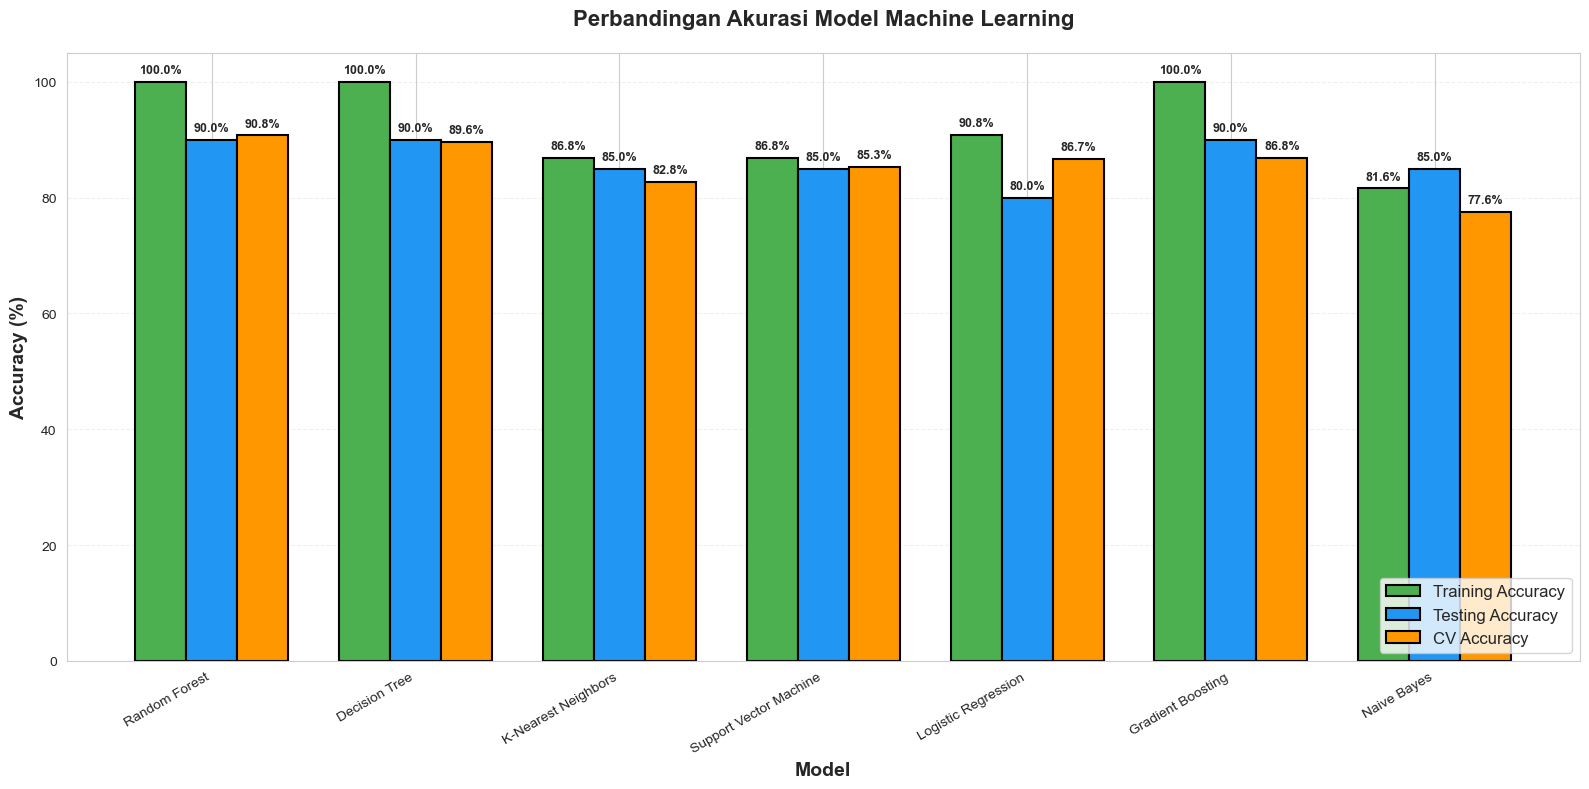

In [58]:
model_names = list(results.keys())
train_accuracies = [results[m]['train_accuracy']*100 for m in model_names]
test_accuracies = [results[m]['test_accuracy']*100 for m in model_names]
cv_accuracies = [results[m]['cv_mean']*100 for m in model_names]

x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots(figsize=(16, 8))
bars1 = ax.bar(x - width, train_accuracies, width, label='Training Accuracy', 
               color='#4CAF50', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x, test_accuracies, width, label='Testing Accuracy', 
               color='#2196F3', edgecolor='black', linewidth=1.5)
bars3 = ax.bar(x + width, cv_accuracies, width, label='CV Accuracy', 
               color='#FF9800', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_title('Perbandingan Akurasi Model Machine Learning', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=30, ha='right')
ax.legend(loc='lower right', fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim([0, 105])

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

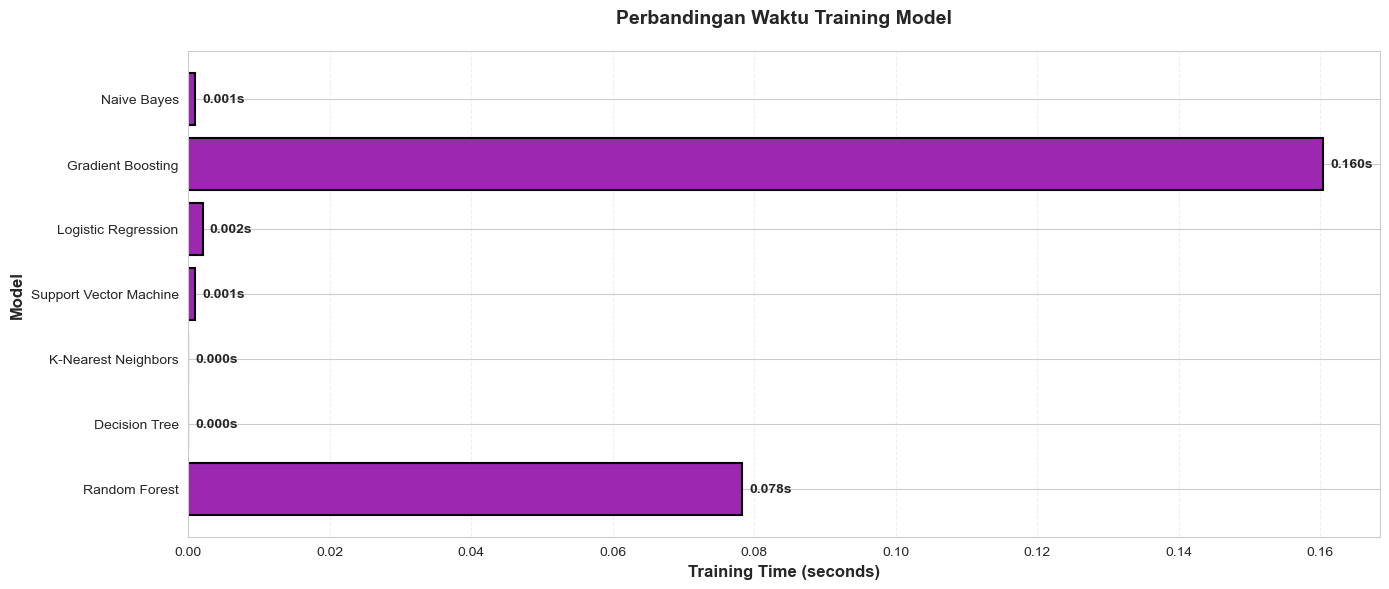

In [59]:
training_times = [results[m]['training_time'] for m in model_names]

fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.barh(model_names, training_times, color='#9C27B0', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Training Time (seconds)', fontsize=12, fontweight='bold')
ax.set_ylabel('Model', fontsize=12, fontweight='bold')
ax.set_title('Perbandingan Waktu Training Model', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')

for i, (bar, time) in enumerate(zip(bars, training_times)):
    width = bar.get_width()
    ax.text(width + 0.001, bar.get_y() + bar.get_height()/2.,
            f'{time:.3f}s', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 7️⃣ Analisis Model Terbaik

In [60]:
best_model_name = max(results, key=lambda x: results[x]['test_accuracy'])
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print("\n" + "="*70)
print("🏆 MODEL TERBAIK")
print("="*70)
print(f"\n  Model: {best_model_name}")
print(f"  Training Accuracy:   {results[best_model_name]['train_accuracy']*100:.2f}%")
print(f"  Testing Accuracy:    {results[best_model_name]['test_accuracy']*100:.2f}%")
print(f"  CV Accuracy:         {results[best_model_name]['cv_mean']*100:.2f}% (±{results[best_model_name]['cv_std']*100:.2f}%)")
print(f"  Training Time:       {results[best_model_name]['training_time']:.3f} seconds")
print("\n" + "="*70)


🏆 MODEL TERBAIK

  Model: Random Forest
  Training Accuracy:   100.00%
  Testing Accuracy:    90.00%
  CV Accuracy:         90.75% (±6.83%)
  Training Time:       0.078 seconds



In [61]:
print("\n📋 Classification Report - Model Terbaik:")
print("="*70)
print(classification_report(y_test, best_predictions, 
                          target_names=le.classes_,
                          digits=4))


📋 Classification Report - Model Terbaik:
              precision    recall  f1-score   support

    Berangin     0.8000    1.0000    0.8889         4
     Berawan     1.0000    0.6667    0.8000         3
       Cerah     0.8750    0.8750    0.8750         8
       Hujan     1.0000    1.0000    1.0000         5

    accuracy                         0.9000        20
   macro avg     0.9187    0.8854    0.8910        20
weighted avg     0.9100    0.9000    0.8978        20



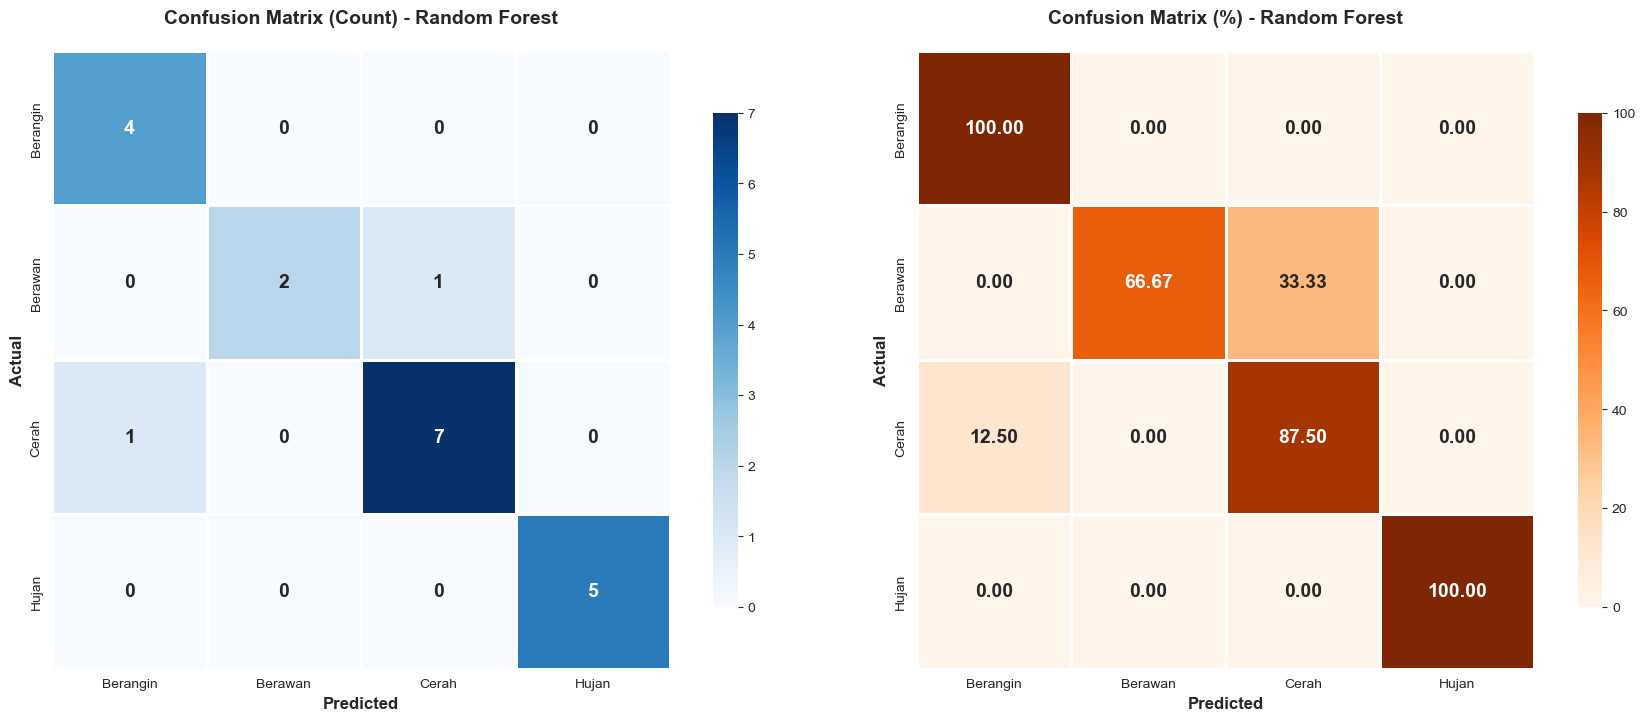

In [62]:
cm = confusion_matrix(y_test, best_predictions)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            ax=axes[0], annot_kws={'size': 14, 'weight': 'bold'})
axes[0].set_title(f'Confusion Matrix (Count) - {best_model_name}', 
                  fontsize=14, fontweight='bold', pad=20)
axes[0].set_ylabel('Actual', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=12, fontweight='bold')

sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Oranges', 
            xticklabels=le.classes_, yticklabels=le.classes_,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            ax=axes[1], annot_kws={'size': 14, 'weight': 'bold'})
axes[1].set_title(f'Confusion Matrix (%) - {best_model_name}', 
                  fontsize=14, fontweight='bold', pad=20)
axes[1].set_ylabel('Actual', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [63]:
print("\n📊 Detailed Metrics per Class:")
print("="*70)

for i, class_name in enumerate(le.classes_):
    y_test_binary = (y_test == i).astype(int)
    y_pred_binary = (best_predictions == i).astype(int)
    
    precision = precision_score(y_test_binary, y_pred_binary, zero_division=0)
    recall = recall_score(y_test_binary, y_pred_binary, zero_division=0)
    f1 = f1_score(y_test_binary, y_pred_binary, zero_division=0)
    
    print(f"\n{class_name}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")


📊 Detailed Metrics per Class:

Berangin:
  Precision: 0.8000
  Recall:    1.0000
  F1-Score:  0.8889

Berawan:
  Precision: 1.0000
  Recall:    0.6667
  F1-Score:  0.8000

Cerah:
  Precision: 0.8750
  Recall:    0.8750
  F1-Score:  0.8750

Hujan:
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000


## 8️⃣ Feature Importance Analysis


📊 Feature Importance:
               Feature  Importance
Kecepatan Angin (km/h)    0.279112
      Curah Hujan (mm)    0.266513
  Arah Angin (derajat)    0.142173
        Kelembapan (%)    0.120063
   Tekanan Udara (hPa)    0.107472
        Suhu (Celsius)    0.084667
        Ketinggian (m)    0.000000
       Lokasi_Latitude    0.000000
      Lokasi_Longitude    0.000000


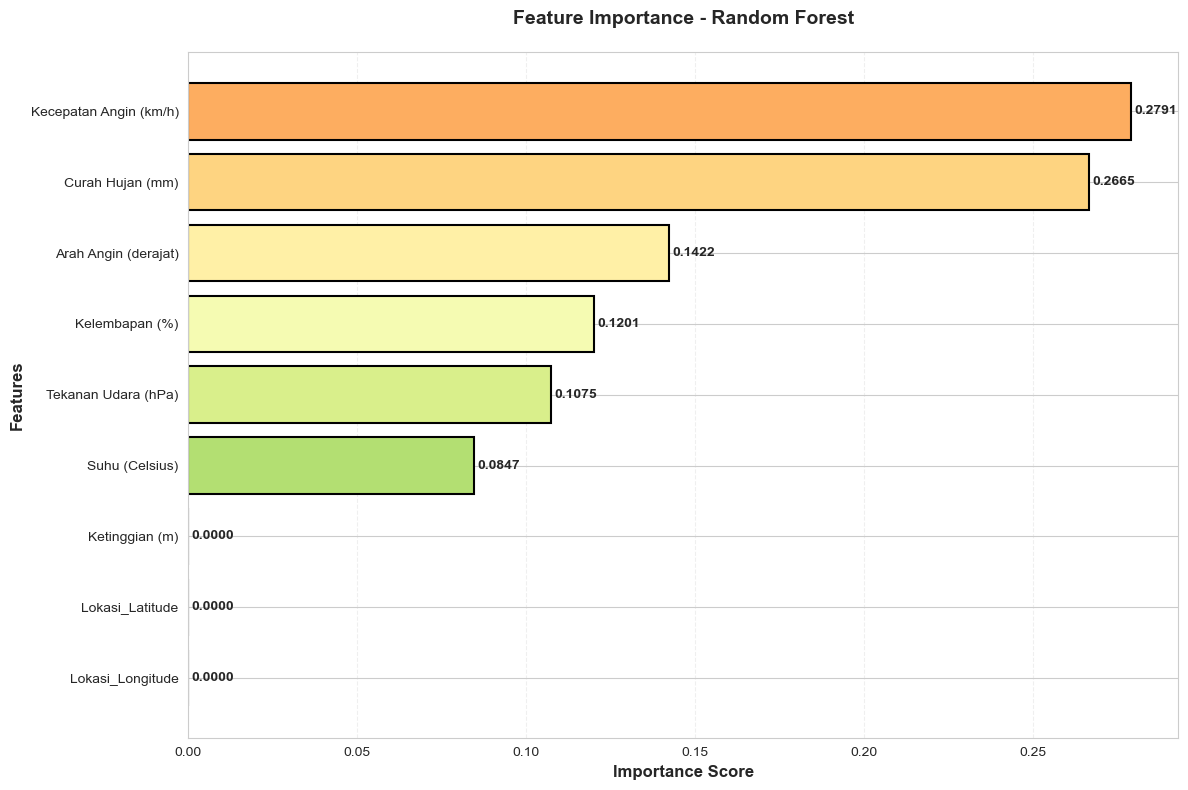

In [64]:
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\n📊 Feature Importance:")
    print("="*70)
    print(feature_importance.to_string(index=False))
    print("="*70)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(feature_importance)))
    bars = ax.barh(feature_importance['Feature'], feature_importance['Importance'], 
                   color=colors, edgecolor='black', linewidth=1.5)
    
    ax.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
    ax.set_ylabel('Features', fontsize=12, fontweight='bold')
    ax.set_title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.001, bar.get_y() + bar.get_height()/2.,
                f'{width:.4f}', ha='left', va='center', fontsize=10, fontweight='bold')
    
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()
    
else:
    print(f"\n⚠️ Model {best_model_name} tidak memiliki feature_importances_ attribute.")
    print("   Feature importance hanya tersedia untuk model berbasis tree.")

## 9️⃣ Fungsi Prediksi Data Baru

In [65]:
def prediksi_cuaca_baru(suhu, kelembapan, tekanan, kecepatan_angin, 
                        arah_angin, curah_hujan, ketinggian, lat, lon,
                        tampilkan_detail=True):
    data_baru = pd.DataFrame({
        'Suhu (Celsius)': [suhu],
        'Kelembapan (%)': [kelembapan],
        'Tekanan Udara (hPa)': [tekanan],
        'Kecepatan Angin (km/h)': [kecepatan_angin],
        'Arah Angin (derajat)': [arah_angin],
        'Curah Hujan (mm)': [curah_hujan],
        'Ketinggian (m)': [ketinggian],
        'Lokasi_Latitude': [lat],
        'Lokasi_Longitude': [lon]
    })
    
    data_baru_scaled = scaler.transform(data_baru)
    
    prediksi = best_model.predict(data_baru_scaled)[0]
    kondisi = le.inverse_transform([prediksi])[0]
    
    if hasattr(best_model, 'predict_proba'):
        prediksi_proba = best_model.predict_proba(data_baru_scaled)[0]
        proba_dict = {kelas: prob for kelas, prob in zip(le.classes_, prediksi_proba)}
    else:
        prediksi_proba = None
        proba_dict = None
    
    if tampilkan_detail:
        print("\n" + "="*70)
        print("🌤️  HASIL PREDIKSI CUACA")
        print("="*70)
        print(f"\n📍 Input Parameter:")
        print(f"   Suhu:             {suhu}°C")
        print(f"   Kelembapan:       {kelembapan}%")
        print(f"   Tekanan Udara:    {tekanan} hPa")
        print(f"   Kecepatan Angin:  {kecepatan_angin} km/h")
        print(f"   Arah Angin:       {arah_angin}°")
        print(f"   Curah Hujan:      {curah_hujan} mm")
        print(f"   Ketinggian:       {ketinggian} m")
        print(f"   Lokasi:           ({lat}, {lon})")
        
        print(f"\n🎯 Prediksi Kondisi Cuaca: {kondisi}")
        
        if prediksi_proba is not None:
            print(f"\n📊 Probabilitas untuk setiap kondisi:")
            for kelas, prob in proba_dict.items():
                bar = '█' * int(prob * 50)
                print(f"   {kelas:15s}: {prob*100:6.2f}% {bar}")
        
        print("\n" + "="*70)
    
    return {
        'kondisi': kondisi,
        'probabilitas': proba_dict,
        'input': data_baru.to_dict('records')[0]
    }

print("✅ Fungsi prediksi_cuaca_baru() berhasil dibuat!")

✅ Fungsi prediksi_cuaca_baru() berhasil dibuat!


## 🔟 Testing Prediksi dengan Berbagai Skenario

In [66]:
print("\n🧪 Skenario 1: Kondisi Panas dan Cerah")
hasil1 = prediksi_cuaca_baru(
    suhu=30.0, 
    kelembapan=45, 
    tekanan=1016, 
    kecepatan_angin=12, 
    arah_angin=180, 
    curah_hujan=0, 
    ketinggian=100, 
    lat=-6.175, 
    lon=106.828
)


🧪 Skenario 1: Kondisi Panas dan Cerah

🌤️  HASIL PREDIKSI CUACA

📍 Input Parameter:
   Suhu:             30.0°C
   Kelembapan:       45%
   Tekanan Udara:    1016 hPa
   Kecepatan Angin:  12 km/h
   Arah Angin:       180°
   Curah Hujan:      0 mm
   Ketinggian:       100 m
   Lokasi:           (-6.175, 106.828)

🎯 Prediksi Kondisi Cuaca: Cerah

📊 Probabilitas untuk setiap kondisi:
   Berangin       :  15.00% ███████
   Berawan        :  10.00% █████
   Cerah          :  75.00% █████████████████████████████████████
   Hujan          :   0.00% 



In [67]:
print("\n🧪 Skenario 2: Kondisi Hujan Lebat")
hasil2 = prediksi_cuaca_baru(
    suhu=23.5, 
    kelembapan=78, 
    tekanan=1008, 
    kecepatan_angin=18, 
    arah_angin=270, 
    curah_hujan=4.2, 
    ketinggian=100, 
    lat=-6.175, 
    lon=106.828
)


🧪 Skenario 2: Kondisi Hujan Lebat

🌤️  HASIL PREDIKSI CUACA

📍 Input Parameter:
   Suhu:             23.5°C
   Kelembapan:       78%
   Tekanan Udara:    1008 hPa
   Kecepatan Angin:  18 km/h
   Arah Angin:       270°
   Curah Hujan:      4.2 mm
   Ketinggian:       100 m
   Lokasi:           (-6.175, 106.828)

🎯 Prediksi Kondisi Cuaca: Hujan

📊 Probabilitas untuk setiap kondisi:
   Berangin       :   0.00% 
   Berawan        :  10.00% █████
   Cerah          :  11.00% █████
   Hujan          :  79.00% ███████████████████████████████████████



In [68]:
print("\n🧪 Skenario 3: Kondisi Berawan")
hasil3 = prediksi_cuaca_baru(
    suhu=25.0, 
    kelembapan=72, 
    tekanan=1009, 
    kecepatan_angin=15, 
    arah_angin=200, 
    curah_hujan=0.5, 
    ketinggian=100, 
    lat=-6.175, 
    lon=106.828
)


🧪 Skenario 3: Kondisi Berawan

🌤️  HASIL PREDIKSI CUACA

📍 Input Parameter:
   Suhu:             25.0°C
   Kelembapan:       72%
   Tekanan Udara:    1009 hPa
   Kecepatan Angin:  15 km/h
   Arah Angin:       200°
   Curah Hujan:      0.5 mm
   Ketinggian:       100 m
   Lokasi:           (-6.175, 106.828)

🎯 Prediksi Kondisi Cuaca: Cerah

📊 Probabilitas untuk setiap kondisi:
   Berangin       :   0.00% 
   Berawan        :  46.00% ███████████████████████
   Cerah          :  48.00% ████████████████████████
   Hujan          :   6.00% ███



In [69]:
print("\n🧪 Skenario 4: Kondisi Berangin Kencang")
hasil4 = prediksi_cuaca_baru(
    suhu=27.0, 
    kelembapan=55, 
    tekanan=1013, 
    kecepatan_angin=35, 
    arah_angin=90, 
    curah_hujan=0, 
    ketinggian=100, 
    lat=-6.175, 
    lon=106.828
)


🧪 Skenario 4: Kondisi Berangin Kencang

🌤️  HASIL PREDIKSI CUACA

📍 Input Parameter:
   Suhu:             27.0°C
   Kelembapan:       55%
   Tekanan Udara:    1013 hPa
   Kecepatan Angin:  35 km/h
   Arah Angin:       90°
   Curah Hujan:      0 mm
   Ketinggian:       100 m
   Lokasi:           (-6.175, 106.828)

🎯 Prediksi Kondisi Cuaca: Berangin

📊 Probabilitas untuk setiap kondisi:
   Berangin       :  78.00% ███████████████████████████████████████
   Berawan        :   7.00% ███
   Cerah          :  10.00% █████
   Hujan          :   5.00% ██



## 1️⃣1️⃣ Menyimpan Model (Model Persistence)

In [70]:
with open('model_cuaca_terbaik.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('scaler_cuaca.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('label_encoder_cuaca.pkl', 'wb') as f:
    pickle.dump(le, f)

with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)

joblib.dump(best_model, 'model_cuaca_terbaik.joblib')
joblib.dump(scaler, 'scaler_cuaca.joblib')
joblib.dump(le, 'label_encoder_cuaca.joblib')

print("\n💾 Model berhasil disimpan!")
print("="*70)
print("\nFile yang tersimpan:")
print("  ✅ model_cuaca_terbaik.pkl")
print("  ✅ scaler_cuaca.pkl")
print("  ✅ label_encoder_cuaca.pkl")
print("  ✅ feature_columns.pkl")
print("  ✅ model_cuaca_terbaik.joblib (alternatif)")
print("  ✅ scaler_cuaca.joblib (alternatif)")
print("  ✅ label_encoder_cuaca.joblib (alternatif)")
print("\n" + "="*70)


💾 Model berhasil disimpan!

File yang tersimpan:
  ✅ model_cuaca_terbaik.pkl
  ✅ scaler_cuaca.pkl
  ✅ label_encoder_cuaca.pkl
  ✅ feature_columns.pkl
  ✅ model_cuaca_terbaik.joblib (alternatif)
  ✅ scaler_cuaca.joblib (alternatif)
  ✅ label_encoder_cuaca.joblib (alternatif)



## 1️⃣2️⃣ Cara Load Model untuk Penggunaan di Masa Depan

In [71]:
import pickle
import pandas as pd
import numpy as np

with open('model_cuaca_terbaik.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('scaler_cuaca.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

with open('label_encoder_cuaca.pkl', 'rb') as f:
    loaded_le = pickle.load(f)

with open('feature_columns.pkl', 'rb') as f:
    loaded_features = pickle.load(f)

data_baru = pd.DataFrame({
    'Suhu (Celsius)': [28.0],
    'Kelembapan (%)': [60],
    'Tekanan Udara (hPa)': [1012],
    'Kecepatan Angin (km/h)': [20],
    'Arah Angin (derajat)': [180],
    'Curah Hujan (mm)': [0],
    'Ketinggian (m)': [100],
    'Lokasi_Latitude': [-6.175],
    'Lokasi_Longitude': [106.828]
})

data_scaled = loaded_scaler.transform(data_baru)

prediksi = loaded_model.predict(data_scaled)
kondisi = loaded_le.inverse_transform(prediksi)

if hasattr(loaded_model, 'predict_proba'):
    probabilitas = loaded_model.predict_proba(data_scaled)
    print(f"Probabilitas: {probabilitas}")

print(f"Prediksi Kondisi Cuaca: {kondisi[0]}")

import joblib

loaded_model = joblib.load('model_cuaca_terbaik.joblib')
loaded_scaler = joblib.load('scaler_cuaca.joblib')
loaded_le = joblib.load('label_encoder_cuaca.joblib')

print("📚 Instruksi load model tersedia di cell ini")

Probabilitas: [[0.   0.04 0.93 0.03]]
Prediksi Kondisi Cuaca: Cerah
📚 Instruksi load model tersedia di cell ini


## 1️⃣3️⃣ Summary & Kesimpulan

In [72]:
print("\n" + "="*70)
print("📊 RINGKASAN PROYEK PREDIKSI CUACA MIKRO")
print("="*70)

print(f"\n📋 Dataset:")
print(f"   • Total Data:        {len(df)} sampel")
print(f"   • Jumlah Fitur:      {len(feature_columns)} fitur")
print(f"   • Jumlah Kelas:      {len(le.classes_)} kelas")
print(f"   • Kelas Target:      {', '.join(le.classes_)}")

print(f"\n🤖 Machine Learning:")
print(f"   • Total Model:       {len(models)} model")
print(f"   • Model Terbaik:     {best_model_name}")
print(f"   • Testing Accuracy:  {results[best_model_name]['test_accuracy']*100:.2f}%")
print(f"   • CV Accuracy:       {results[best_model_name]['cv_mean']*100:.2f}% (±{results[best_model_name]['cv_std']*100:.2f}%)")

print(f"\n🎯 Performa Top 3 Model:")
top_3 = comparison_df.head(3)
for idx, row in top_3.iterrows():
    print(f"   {idx+1}. {row['Model']:25s} - {row['Test Accuracy']:.2f}%")

if hasattr(best_model, 'feature_importances_'):
    print(f"\n📊 Top 3 Fitur Paling Penting:")
    for idx, row in feature_importance.head(3).iterrows():
        print(f"   {idx+1}. {row['Feature']:25s} - {row['Importance']:.4f}")

print(f"\n💾 Output:")
print(f"   • Model tersimpan:   model_cuaca_terbaik.pkl")
print(f"   • Scaler tersimpan:  scaler_cuaca.pkl")
print(f"   • Encoder tersimpan: label_encoder_cuaca.pkl")

print("\n" + "="*70)
print("✅ PROYEK PREDIKSI CUACA MIKRO SELESAI!")
print("="*70)

print(f"\n🎉 Selamat! Model prediksi cuaca mikro Anda siap digunakan!")
print(f"📅 Waktu selesai: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("\n" + "="*70)


📊 RINGKASAN PROYEK PREDIKSI CUACA MIKRO

📋 Dataset:
   • Total Data:        96 sampel
   • Jumlah Fitur:      9 fitur
   • Jumlah Kelas:      4 kelas
   • Kelas Target:      Berangin, Berawan, Cerah, Hujan

🤖 Machine Learning:
   • Total Model:       7 model
   • Model Terbaik:     Random Forest
   • Testing Accuracy:  90.00%
   • CV Accuracy:       90.75% (±6.83%)

🎯 Performa Top 3 Model:
   1. Random Forest             - 90.00%
   2. Decision Tree             - 90.00%
   6. Gradient Boosting         - 90.00%

📊 Top 3 Fitur Paling Penting:
   4. Kecepatan Angin (km/h)    - 0.2791
   6. Curah Hujan (mm)          - 0.2665
   5. Arah Angin (derajat)      - 0.1422

💾 Output:
   • Model tersimpan:   model_cuaca_terbaik.pkl
   • Scaler tersimpan:  scaler_cuaca.pkl
   • Encoder tersimpan: label_encoder_cuaca.pkl

✅ PROYEK PREDIKSI CUACA MIKRO SELESAI!

🎉 Selamat! Model prediksi cuaca mikro Anda siap digunakan!
📅 Waktu selesai: 2025-11-07 22:08:46

